In [3]:
import tracking_kline as tk

In [4]:
kline = tk.kuc_collect_multi_kline(coin_pair="BTC-USDT", interval_unit="hour", interval_int=1, rounds=200)
kline = kline.sort_values(by="time", ascending=True)

kline = tk.change_to_datetime(kline)
kline.head(5)


,open,close,high,low,volume,turnover
time,,,,,,
2017-10-04 00:00:00,4307.0,4307.0,4307.0,4307.0,0.001000,4.307000
2017-10-04 05:00:00,4307.0,4307.0,4307.0,4307.0,0.028360,122.144969
2017-10-05 09:00:00,3500.0,3500.0,3500.0,3500.0,0.010368,36.287685
2017-10-05 20:00:00,4860.0,4860.0,4860.0,4860.0,0.015000,72.900000
2017-10-06 22:00:00,3850.0,3850.0,3850.0,3850.0,0.003568,13.736453


change_open     -0.001151
change_close    -0.002278
change_volume    1.000000
Name: change_volume, dtype: float64


<Axes: title={'center': 'Relationship between Change of Absolute Value of Close Price and Change in Volume'}, xlabel='Percent Change of Volume', ylabel='Percent Change of Close Price'>

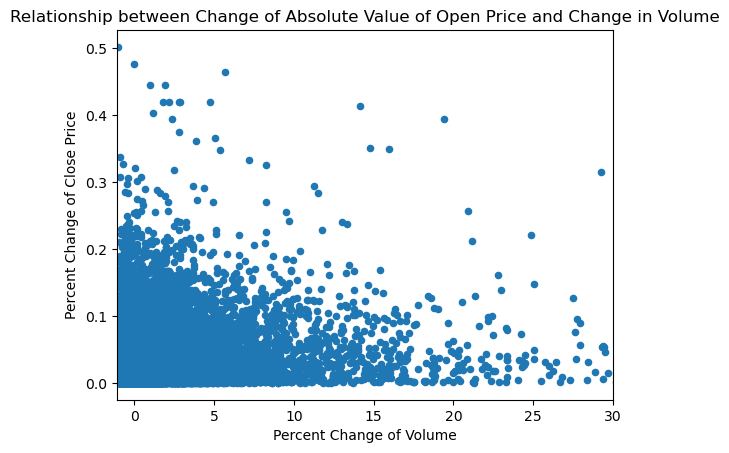

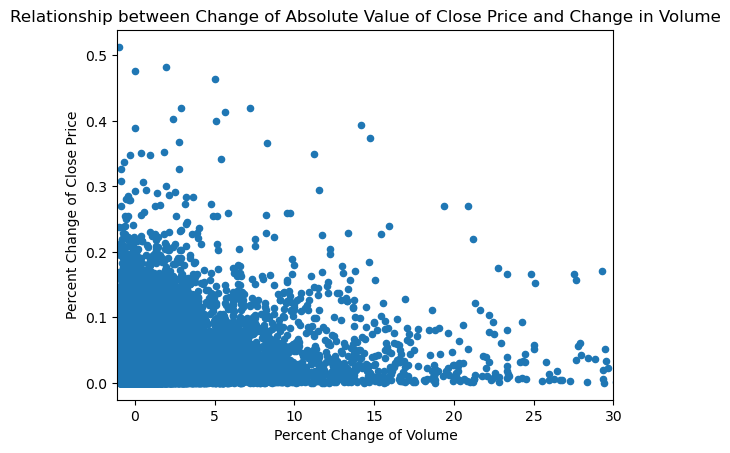

In [43]:
#Calculate changes in the open price, the close price, and the volume using pct_change. 
#24 is used as the change in period to capture the daily change in price/volume
kline['change_open'] = kline['open'].pct_change(24)
kline['change_close'] = kline['close'].pct_change(24)
kline['change_volume'] = kline['volume'].pct_change(24)
#narrow it down to the changes in the relevant columns.
corr_kline = kline[['change_open', 'change_close', 'change_volume']]
#The question is if the change in volume corresponds at all to a change in the magnitude of the price changes.
corr_kline.loc[:,'change_close'] = corr_kline['change_close'].abs()
corr_kline.loc[:,'change_open'] = corr_kline['change_open'].abs()
print(corr_kline.corr()['change_volume'])
#Plot to show any relationship to close price and change in volume
corr_kline.plot("change_volume", "change_close", kind="scatter", ylabel="Percent Change of Close Price", xlabel="Percent Change of Volume",
                title = "Relationship between Change of Absolute Value of Open Price and Change in Volume", xlim=[-1.1,30])
#Plot to show any relationship to open price and change in volume
corr_kline.plot("change_volume", "change_open", kind="scatter", ylabel="Percent Change of Close Price", xlabel="Percent Change of Volume",
                title = "Relationship between Change of Absolute Value of Close Price and Change in Volume", xlim=[-1.1,30])

<Axes: title={'center': 'Percent Change of Close Price vs Month'}, xlabel='Month', ylabel='Percent Change'>

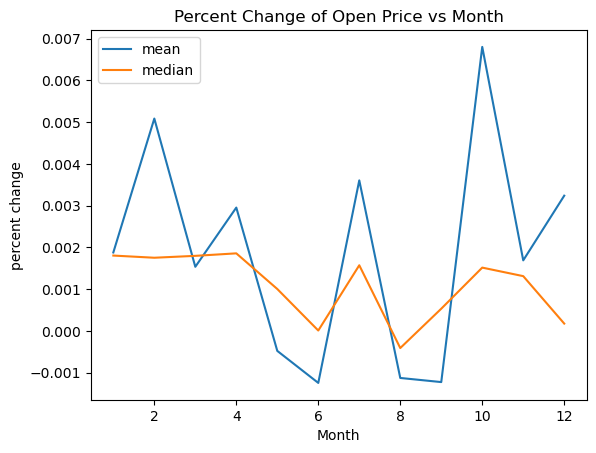

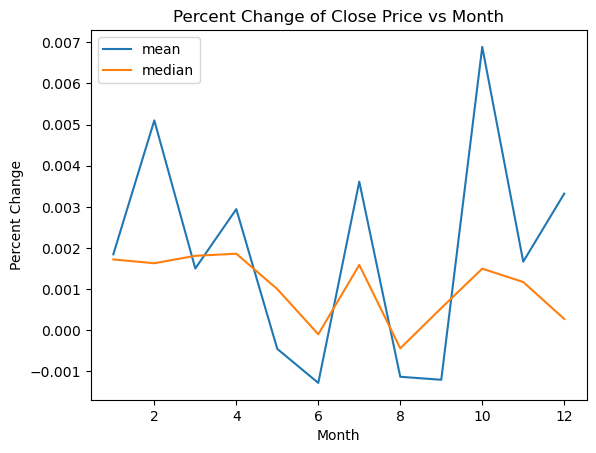

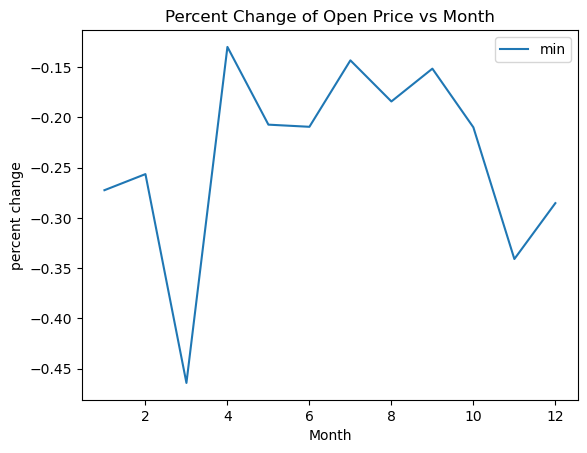

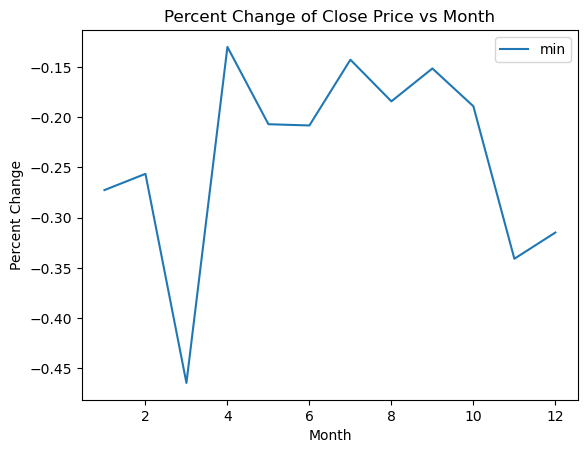

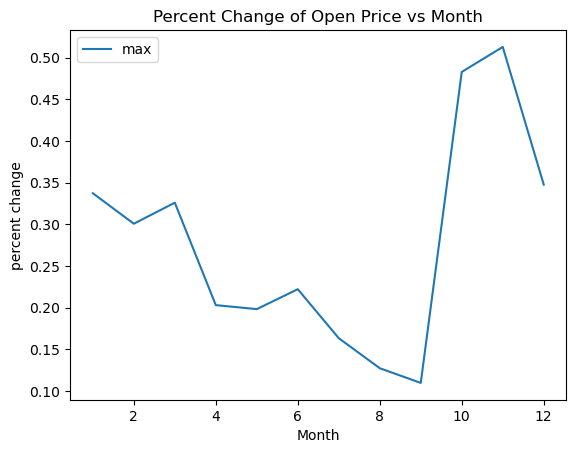

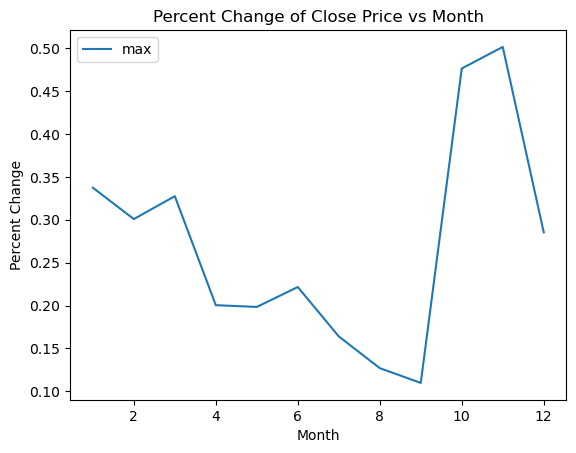

In [44]:
grouped_open = kline['change_open'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Month", xlabel = "Month", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Month", xlabel = "Month", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Month", xlabel = "Month", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Month", xlabel = "Month", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Month", xlabel = "Month", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Month", xlabel = "Month", ylabel="Percent Change")

<Axes: title={'center': 'Close Price vs Month'}, xlabel='Month', ylabel='Dollars'>

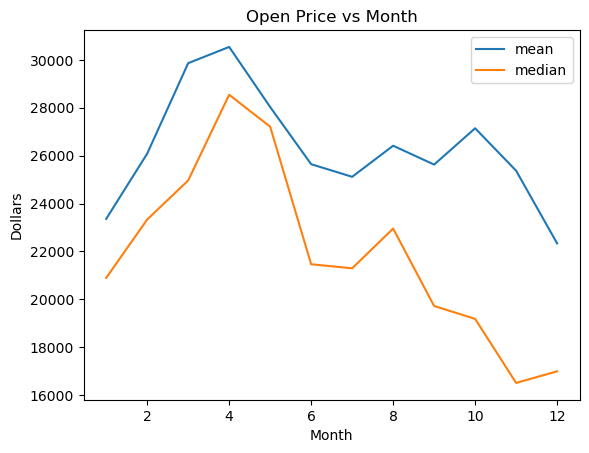

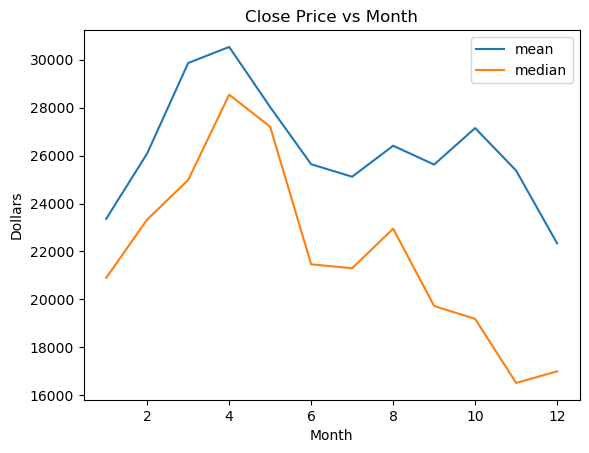

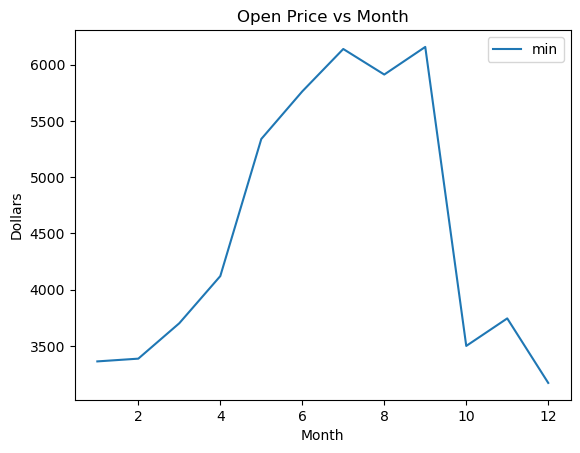

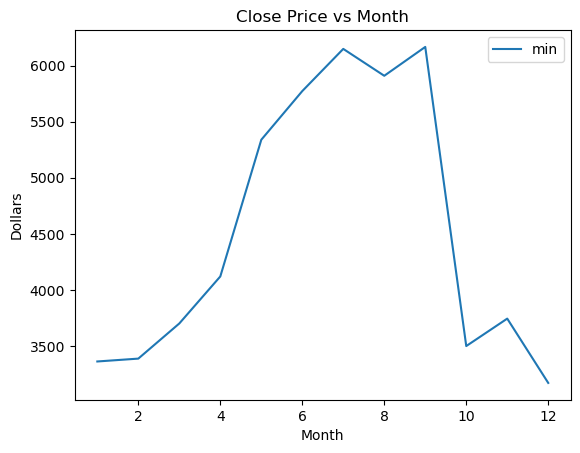

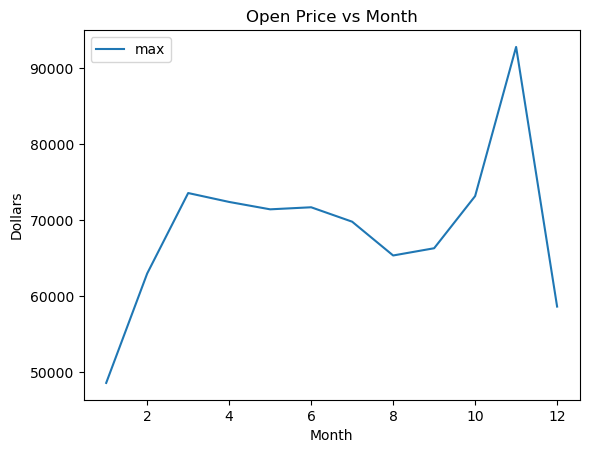

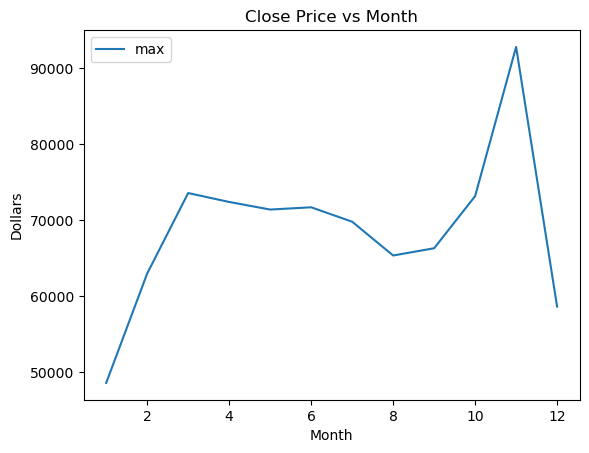

In [45]:
grouped_open = kline['open'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Open Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['close'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Close Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['open'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Open Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['close'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Close Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['open'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Open Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['close'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Close Price vs Month", xlabel = "Month", ylabel="Dollars")

<Axes: title={'center': 'Percent Change of Close Price vs Day of Week'}, xlabel='Day of Week', ylabel='Percent Change'>

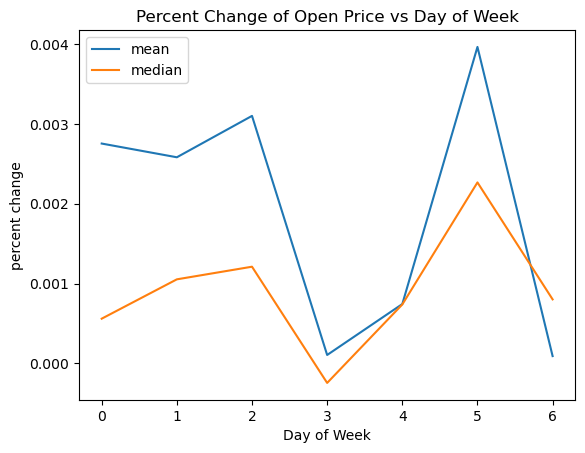

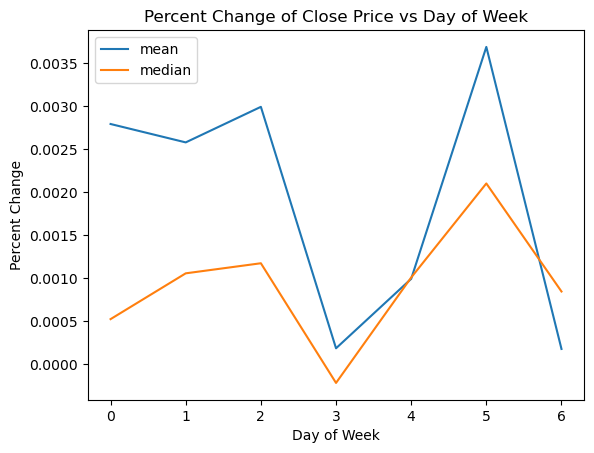

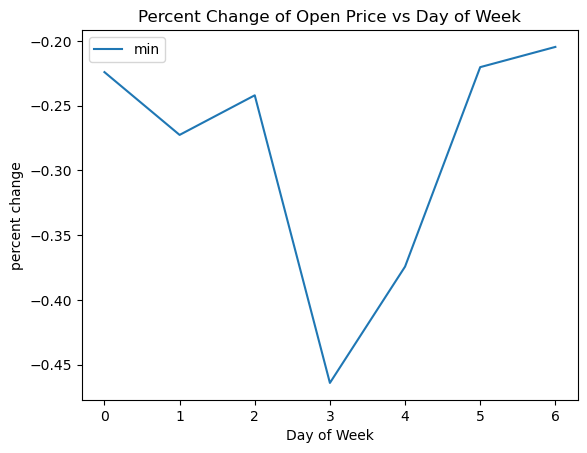

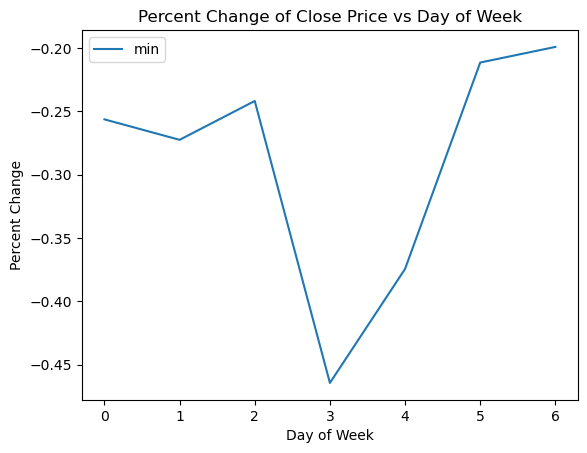

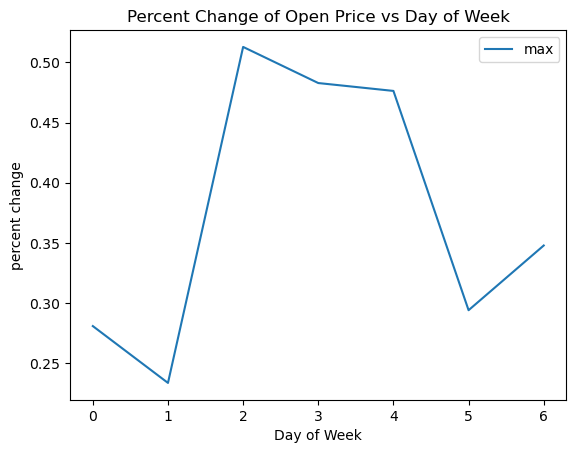

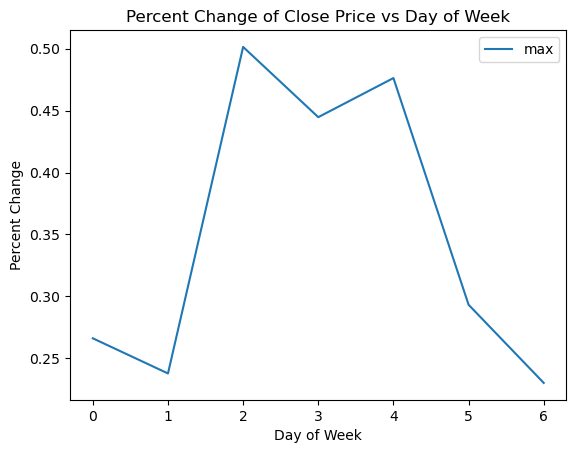

In [46]:
grouped_open = kline['change_open'].groupby(kline.index.day_of_week).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Day of Week", xlabel = "Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.day_of_week).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Day of Week", xlabel = "Day of Week", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.day_of_week).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Day of Week", xlabel = "Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.day_of_week).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Day of Week", xlabel = "Day of Week", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.day_of_week).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Day of Week", xlabel = "Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.day_of_week).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Day of Week", xlabel = "Day of Week", ylabel="Percent Change")

<Axes: title={'center': 'Percent Change of Close Price vs Hour of Day'}, xlabel='Hour of Day', ylabel='Percent Change'>

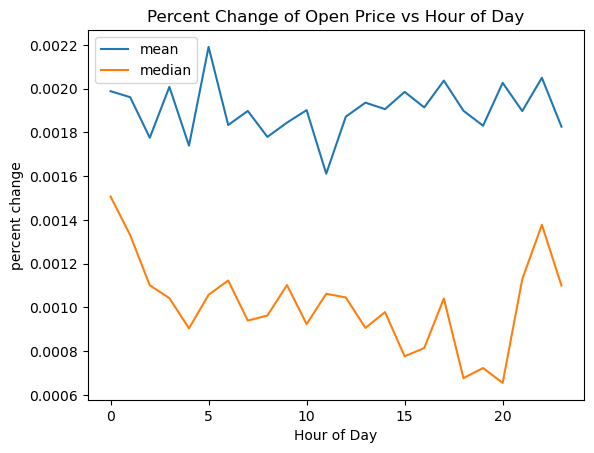

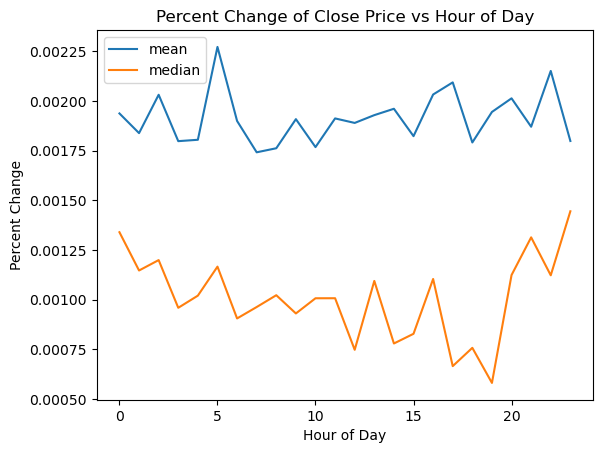

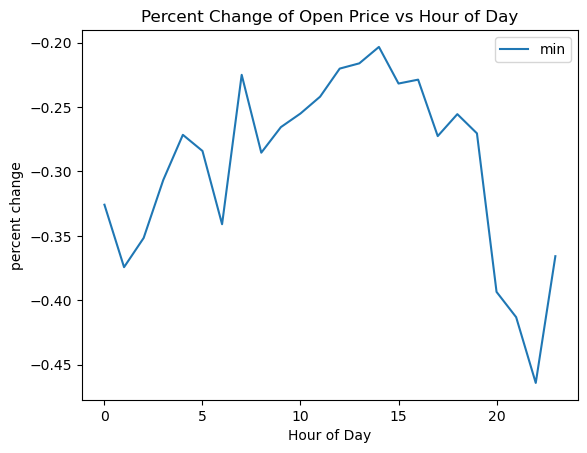

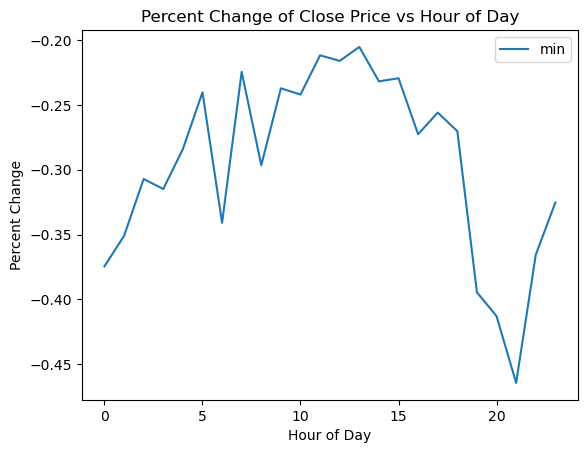

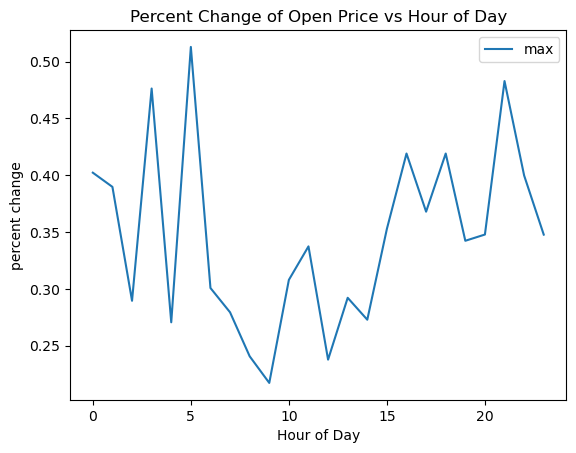

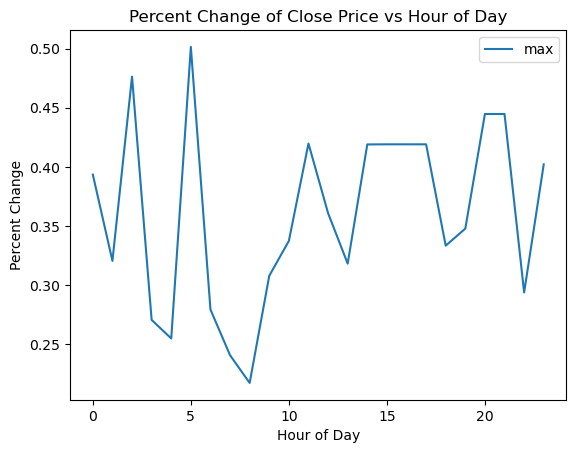

In [47]:
grouped_open = kline['change_open'].groupby(kline.index.hour).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Hour of Day", xlabel = "Hour of Day", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.hour).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Hour of Day", xlabel = "Hour of Day", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.hour).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Hour of Day", xlabel = "Hour of Day", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.hour).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Hour of Day", xlabel = "Hour of Day", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.hour).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Hour of Day", xlabel = "Hour of Day", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.hour).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Hour of Day", xlabel = "Hour of Day", ylabel="Percent Change")

In [48]:
#This code segment is to fit the models
from prophet import Prophet
#The datasets have to include the time column as well as renaming the columns in order to be compatible with Prophet
close_df = kline['close']
close_df = close_df.reset_index()
close_df.columns = ["ds", "y"]

open_df = kline['open']
open_df = open_df.reset_index()
open_df.columns = ["ds", "y"]

#Two separate models are used for each column
open_mod = Prophet()
open_mod.fit(open_df)

close_mod = Prophet()
close_mod.fit(close_df)




19:09:39 - cmdstanpy - INFO - Chain [1] start processing
19:10:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:03 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing


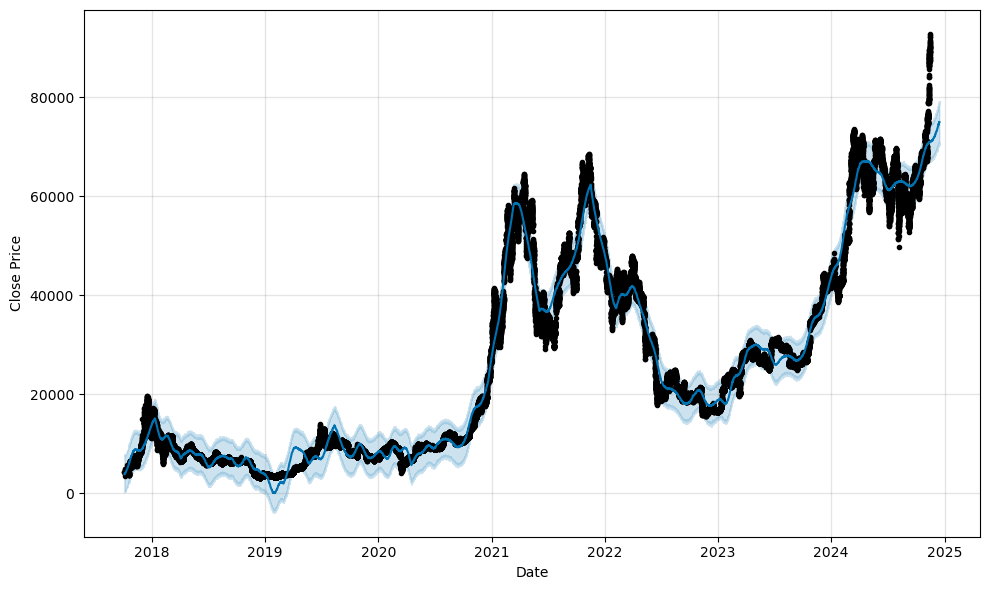

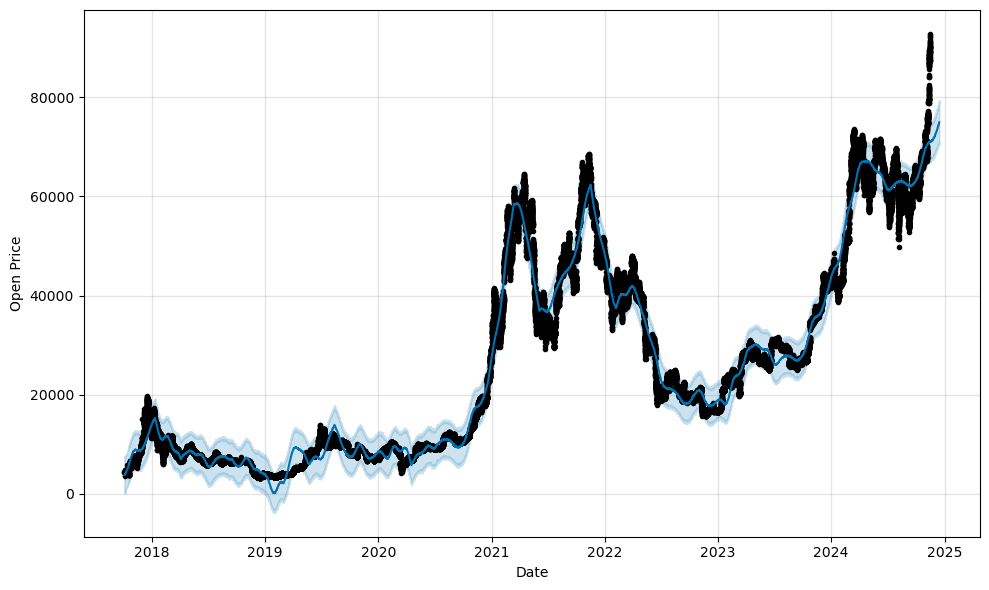

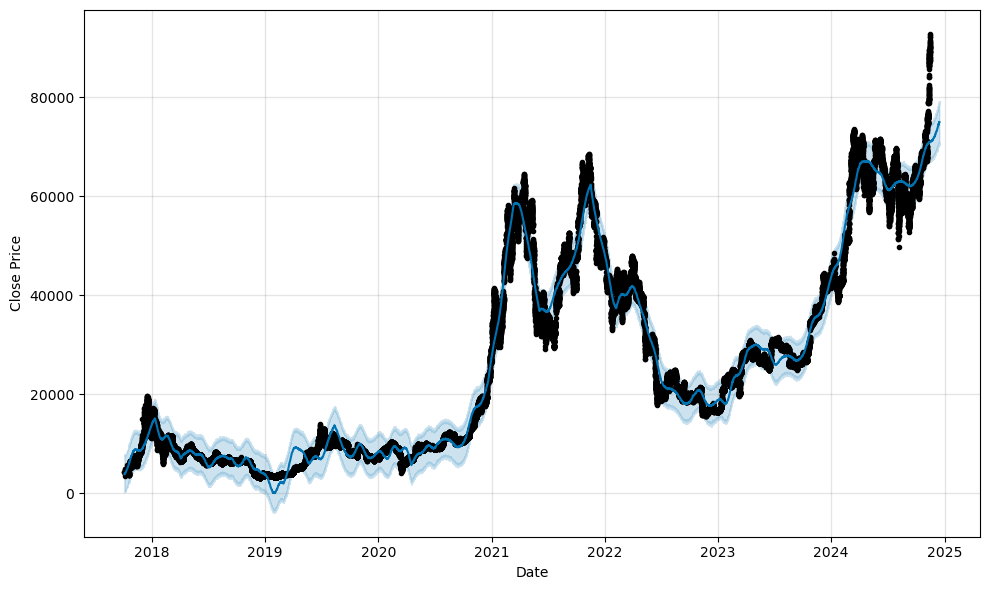

In [49]:
#In this segment the resultant fitted prophet models are graphed
future_dataspans_op = open_mod.make_future_dataframe(720, freq="h")
future_dataspans_op = open_mod.predict(future_dataspans_op)
future_dataspans_cl = close_mod.make_future_dataframe(720, freq="h")
future_dataspans_cl = close_mod.predict(future_dataspans_cl)
open_mod.plot(future_dataspans_op, xlabel="Date", ylabel="Open Price")
close_mod.plot(future_dataspans_cl, xlabel="Date", ylabel="Close Price")

                     date  dollar_equivalent     dollars
61903 2024-11-14 10:00:00         141.461066  141.461066
61904 2024-11-14 11:00:00         141.461066  141.461066
61905 2024-11-14 12:00:00         141.461066  141.461066
61906 2024-11-14 13:00:00         141.461066  141.461066
61907 2024-11-14 14:00:00         141.461066  141.461066
61908 2024-11-14 15:00:00         141.461066  141.461066
61909 2024-11-14 16:00:00         141.461066  141.461066
61910 2024-11-14 17:00:00         141.461066  141.461066
61911 2024-11-14 18:00:00         141.461066  141.461066
61912 2024-11-14 19:00:00         141.461066  141.461066


<Axes: xlabel='date', ylabel='[dollars]'>

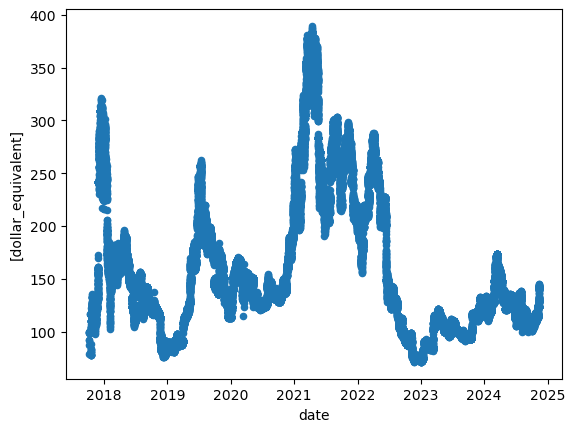

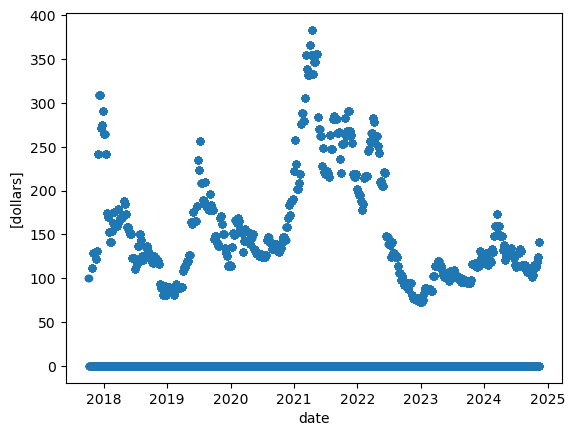

In [ ]:
import pandas as pd

#This is to test the strategy
dollars = 100
coins = 0
#Use 0.005 as a base cost for trading transaction
cost = 0.005
wallet = []
raw_dollars = []
trades = []
time_trades = []
last_buy = 0
last_sell = 0
for i in range(len(kline['close'])):
    buy_time_check = (kline.index[i].day_of_week == 3) * (kline.index[i].hour == 20)
    sell_time_check = (kline.index[i].day_of_week == 2) * (kline.index[i].hour == 5)
    if dollars > 0:
        if buy_time_check:
            coins = dollars * (1-cost) / kline.iloc[i, 1]
            dollars = 0
            last_buy = kline.iloc[i, 1]
    elif coins > 0:
        if sell_time_check:
            dollars = coins * (1-cost) * kline.iloc[i, 1]
            coins = 0
            last_sell = kline.iloc[i, 1]
            time_trades.append(kline.index[i])
            trades.append((last_sell - last_buy) / last_buy)
            
            
    dollar_eq = float(dollars + coins * (1-cost) * kline.iloc[i, 1])
    wallet.append(dollar_eq)
    raw_dollars.append(dollars)

results = pd.DataFrame({"date":kline.index, "dollar_equivalent":wallet, "dollars":raw_dollars})
print(results.tail(10))
results.plot(x="date", y=["dollar_equivalent"], kind = "scatter")
results.plot(x="date", y=["dollars"], kind = "scatter")
    
    
    